### Libraries

In [13]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from plotly.subplots import make_subplots
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install imbalanced-learn

In [14]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..','data','03_primary','3.spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

In [11]:
spotify

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,duration_ms_scaled,popularity_scaled,track_genre_encoded,intensity,popularity_class
0,73.0,0.669059,0.460989,1,0.779395,0.128221,0.032329,0.000001,0.352006,0.718593,0.301970,acoustic,0.461947,0.920689,0,0.308429,1
1,55.0,0.394881,0.165983,1,0.574223,0.057482,0.927711,0.000006,0.092607,0.268342,0.243282,acoustic,0.387347,0.849624,0,0.065544,1
2,57.0,0.414159,0.358987,0,0.720948,0.035635,0.210843,0.000000,0.108756,0.120603,0.236770,acoustic,0.446450,0.858572,0,0.148678,1
3,71.0,0.229945,0.059581,0,0.549185,0.015060,0.908635,0.000071,0.123896,0.143719,0.830006,acoustic,0.439024,0.913703,0,0.013700,1
4,82.0,0.606940,0.442989,2,0.721984,0.032347,0.470884,0.000000,0.074338,0.167839,0.482246,acoustic,0.436375,0.949954,0,0.268868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,21.0,0.129271,0.234985,5,0.590693,0.021317,0.642570,0.928000,0.077769,0.034070,0.516273,world-music,0.550216,0.611400,113,0.030377,0
113795,22.0,0.131413,0.116982,0,0.553039,0.019090,0.997992,0.976000,0.096644,0.035176,0.286899,world-music,0.550216,0.622734,113,0.015373,0
113796,22.0,0.618721,0.328986,0,0.698238,0.021105,0.870482,0.000000,0.075347,0.746734,0.552197,world-music,0.490010,0.622734,113,0.203551,0
113797,41.0,0.573739,0.505990,7,0.698355,0.008060,0.382530,0.000000,0.263184,0.415075,0.572356,world-music,0.497723,0.776273,113,0.290306,1


# Linear Regresion

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las combinaciones recomendadas de predictores
predictors_essential = ['danceability', 'energy', 'loudness', 'speechiness', 'intensity']
predictors_simplified = ['loudness', 'intensity', 'speechiness']
predictors_moderate = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'intensity']
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Función para probar modelos y agregar métricas adicionales
def probar_modelo_con_metricas(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_scaled'], test_size=0.2, random_state=42)

    # Regresión Lineal
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    lin_pred = lin_model.predict(X_test)
    lin_mse = mean_squared_error(y_test, lin_pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_mae = mean_absolute_error(y_test, lin_pred)
    lin_r2 = r2_score(y_test, lin_pred)
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = np.sqrt(rf_mse)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_r2 = r2_score(y_test, rf_pred)
    
    # Árbol de Decisión (Decision Tree)
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)
    tree_pred = tree_model.predict(X_test)
    tree_mse = mean_squared_error(y_test, tree_pred)
    tree_rmse = np.sqrt(tree_mse)
    tree_mae = mean_absolute_error(y_test, tree_pred)
    tree_r2 = r2_score(y_test, tree_pred)
    
    # Resultados
    resultados = {
        'Conjunto de Predictores': nombre_conjunto,
        'Linear Regression MSE': lin_mse,
        'Linear Regression RMSE': lin_rmse,
        'Linear Regression MAE': lin_mae,
        'Linear Regression R²': lin_r2,
        'Random Forest MSE': rf_mse,
        'Random Forest RMSE': rf_rmse,
        'Random Forest MAE': rf_mae,
        'Random Forest R²': rf_r2,
        'Decision Tree MSE': tree_mse,
        'Decision Tree RMSE': tree_rmse,
        'Decision Tree MAE': tree_mae,
        'Decision Tree R²': tree_r2
    }
    
    return resultados

# Probar con los cuatro conjuntos de predictores
#resultados_essential = probar_modelo_con_metricas(predictors_essential, 'Essential Predictors')
#resultados_simplified = probar_modelo_con_metricas(predictors_simplified, 'Simplified Predictors')
#resultados_moderate = probar_modelo_con_metricas(predictors_moderate, 'Moderate Predictors')
#resultados_complete = probar_modelo_con_metricas(predictors_complete, 'Complete Predictors')

# Mostrar los resultados de las pruebas con diferentes conjuntos de predictores
#resultados_finales = pd.DataFrame([resultados_essential, resultados_simplified, resultados_moderate, resultados_complete])
#print(resultados_finales)

In [5]:
#resultados_finales

### Random Forest es el mejor modelo

# Logistic Regresion

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Definir las combinaciones recomendadas de predictores
predictors_essential = ['danceability', 'energy', 'loudness', 'speechiness', 'intensity']
predictors_simplified = ['loudness', 'intensity', 'speechiness']
predictors_moderate = ['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'intensity']
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Función para graficar la matriz de confusión y la curva ROC en una sola figura
def plot_conf_matrix_and_roc(model_name, y_test, y_pred, fpr, tpr, auc_score):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Crear subplots con 1 fila y 2 columnas
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
    ax[0].set_title(f"Matriz de Confusión - {model_name}")
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')

    # Curva ROC
    ax[1].plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', lw=2)
    ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f"ROC Curve - {model_name}")
    ax[1].legend(loc="lower right")

    plt.tight_layout()  # Asegura que los subplots no se solapen
    plt.show()

# Función para entrenar y evaluar Regresión Logística
def logistic_regression_model(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_class'], test_size=0.2, random_state=42)
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)
    log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
    
    # ROC Curve
    fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_proba)
    roc_auc_log = auc(fpr_log, tpr_log)
    
    # Graficar la matriz de confusión y la curva ROC juntas
    plot_conf_matrix_and_roc("Logistic Regression", y_test, log_reg_pred, fpr_log, tpr_log, roc_auc_log)

# Función para entrenar y evaluar SVM
def svm_model(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_class'], test_size=0.2, random_state=42)
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_proba = svm.predict_proba(X_test)[:, 1]
    
    # ROC Curve
    fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    
    # Graficar la matriz de confusión y la curva ROC juntas
    plot_conf_matrix_and_roc("SVM", y_test, svm_pred, fpr_svm, tpr_svm, roc_auc_svm)

# Función para entrenar y evaluar Random Forest
def random_forest_model(predictors, nombre_conjunto):
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify['popularity_class'], test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_proba = rf.predict_proba(X_test)[:, 1]
    
    # ROC Curve
    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    # Graficar la matriz de confusión y la curva ROC juntas
    plot_conf_matrix_and_roc("Random Forest", y_test, rf_pred, fpr_rf, tpr_rf, roc_auc_rf)

### Test Model

In [7]:
# Probar los modelos con diferentes conjuntos de predictores
#logistic_regression_model(predictors_essential, 'Essential Predictors')

In [8]:
#svm_model(predictors_simplified, 'Simplified Predictors')

In [9]:
#random_forest_model(predictors_moderate, 'Moderate Predictors')

### Random Forest es el mejor modelo

In [10]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    # Realizar predicciones
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)    
    f1 = f1_score(y_test, y_pred)
    
    # Mostrar los resultados
    print(f"Evaluación del modelo: {nombre_modelo}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Classification Report:\n{class_report}")
    
    # Retornar las métricas
    return {"accuracy": accuracy, "f1": f1, "confusion_matrix": conf_matrix, "classification_report": class_report}

resultados = (random_forest_model)
print(resultados)

<function random_forest_model at 0x0000015C7C4558A0>


### Modelos 

### Resultados log

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Definir las combinaciones recomendadas de predictores
predictors_essential = ['danceability', 'energy', 'loudness', 'speechiness', 'intensity']

def entrenar_modelos(predictors, target):
    """
    Esta función entrena varios modelos de clasificación (Regresión Logística, Random Forest, Decision Tree),
    y evalúa su rendimiento. Se optimiza para reducir el tiempo de ejecución.
    
    Parámetros:
    - predictors: Lista de columnas que serán las características.
    - target: La columna objetivo (etiquetas de clasificación).
    """
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(spotify[predictors], spotify[target], test_size=0.2, random_state=42)
    
    # Hiperparámetros para la búsqueda en GridSearchCV (reduciendo combinaciones)
    hiperparametros = {
        'Regresión Logística': {
            'C': [0.1, 1, 10],  # Reducido
            'solver': ['liblinear']  # Solo un solver para acelerar
        },
        'Random Forest': {
            'n_estimators': [50, 100],  # Reducido
            'max_depth': [None, 10],  # Reducido
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'Árbol de Decisión': {
            'max_depth': [10, 20],  # Reducido
            'min_samples_split': [2, 5],  # Reducido
            'min_samples_leaf': [1, 2]  # Reducido
        }
    }
    
    # Lista de modelos a entrenar
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Árbol de Decisión': DecisionTreeClassifier(random_state=42)
    }
    
    for nombre_modelo, modelo in modelos.items():
        print(f"\nBuscando los mejores hiperparámetros para: {nombre_modelo}")
        
        # Crear el GridSearchCV con n_jobs=-1 para paralelizar y cv=3 para reducir tiempo
        grid_search = GridSearchCV(modelo, hiperparametros[nombre_modelo], cv=3, scoring='accuracy', n_jobs=-1)
        
        # Entrenar el modelo con GridSearchCV
        grid_search.fit(X_train, y_train)
        
        # Obtener los mejores hiperparámetros
        mejor_modelo = grid_search.best_estimator_
        print(f"Mejores hiperparámetros para {nombre_modelo}: {grid_search.best_params_}")
        
        # Predecir en el conjunto de prueba
        y_pred = mejor_modelo.predict(X_test)
        
        # Calcular las métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Calcular matriz de confusión
        confusion_mtx = confusion_matrix(y_test, y_pred)
        
        # Mostrar las métricas en consola
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        # Mostrar la matriz de confusión
        print("Matriz de Confusión (formato texto):")
        print(confusion_mtx)

# Ejemplo de uso (asegúrate de que 'spotify' esté definido con tus datos)
# entrenar_modelos(predictors_essential, 'popularity_scaled')


In [12]:
# Supongamos que tienes un DataFrame llamado 'spotify' con tus datos
entrenar_modelos(predictors_essential, 'popularity_class')


Buscando los mejores hiperparámetros para: Regresión Logística
Mejores hiperparámetros para Regresión Logística: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.6906
Precision: 0.6483
Recall: 0.6906
F1 Score: 0.5893
Matriz de Confusión (formato texto):
[[  373  6732]
 [  311 15344]]

Buscando los mejores hiperparámetros para: Random Forest
Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7404
Precision: 0.7256
Recall: 0.7404
F1 Score: 0.7145
Matriz de Confusión (formato texto):
[[ 2541  4564]
 [ 1345 14310]]

Buscando los mejores hiperparámetros para: Árbol de Decisión


C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.7093
Precision: 0.6859
Recall: 0.7093
F1 Score: 0.6522
Matriz de Confusión (formato texto):
[[ 1340  5765]
 [  852 14803]]


In [13]:
entrenar_modelos(predictors_simplified, 'popularity_class')


Buscando los mejores hiperparámetros para: Regresión Logística
Mejores hiperparámetros para Regresión Logística: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.6925
Precision: 0.6762
Recall: 0.6925
F1 Score: 0.5818
Matriz de Confusión (formato texto):
[[  247  6858]
 [  140 15515]]

Buscando los mejores hiperparámetros para: Random Forest
Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7283
Precision: 0.7101
Recall: 0.7283
F1 Score: 0.6961
Matriz de Confusión (formato texto):
[[ 2211  4894]
 [ 1291 14364]]

Buscando los mejores hiperparámetros para: Árbol de Decisión
Mejores hiperparámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6986
Precision: 0.6671
Recall: 0.6986
F1 Score: 0.6246
Matriz de Confusión (formato texto):
[[  898  6207]
 [  654 15001]]


In [14]:
entrenar_modelos(predictors_moderate, 'popularity_class')


Buscando los mejores hiperparámetros para: Regresión Logística
Mejores hiperparámetros para Regresión Logística: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.6906
Precision: 0.6507
Recall: 0.6906
F1 Score: 0.5852
Matriz de Confusión (formato texto):
[[  311  6794]
 [  249 15406]]

Buscando los mejores hiperparámetros para: Random Forest
Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7505
Precision: 0.7384
Recall: 0.7505
F1 Score: 0.7274
Matriz de Confusión (formato texto):
[[ 2737  4368]
 [ 1310 14345]]

Buscando los mejores hiperparámetros para: Árbol de Decisión
Mejores hiperparámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7104
Precision: 0.6862
Recall: 0.7104
F1 Score: 0.6588
Matriz de Confusión (formato texto):
[[ 1486  5619]
 [  972 14683]]


In [15]:
entrenar_modelos(predictors_complete, 'popularity_class')


Buscando los mejores hiperparámetros para: Regresión Logística
Mejores hiperparámetros para Regresión Logística: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.7057
Precision: 0.6838
Recall: 0.7057
F1 Score: 0.6366
Matriz de Confusión (formato texto):
[[ 1044  6061]
 [  638 15017]]

Buscando los mejores hiperparámetros para: Random Forest
Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7670
Precision: 0.7579
Recall: 0.7670
F1 Score: 0.7485
Matriz de Confusión (formato texto):
[[ 3082  4023]
 [ 1281 14374]]

Buscando los mejores hiperparámetros para: Árbol de Decisión
Mejores hiperparámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7213
Precision: 0.7019
Recall: 0.7213
F1 Score: 0.6800
Matriz de Confusión (formato texto):
[[ 1854  5251]
 [ 1093 14562]]


# Pruebas 

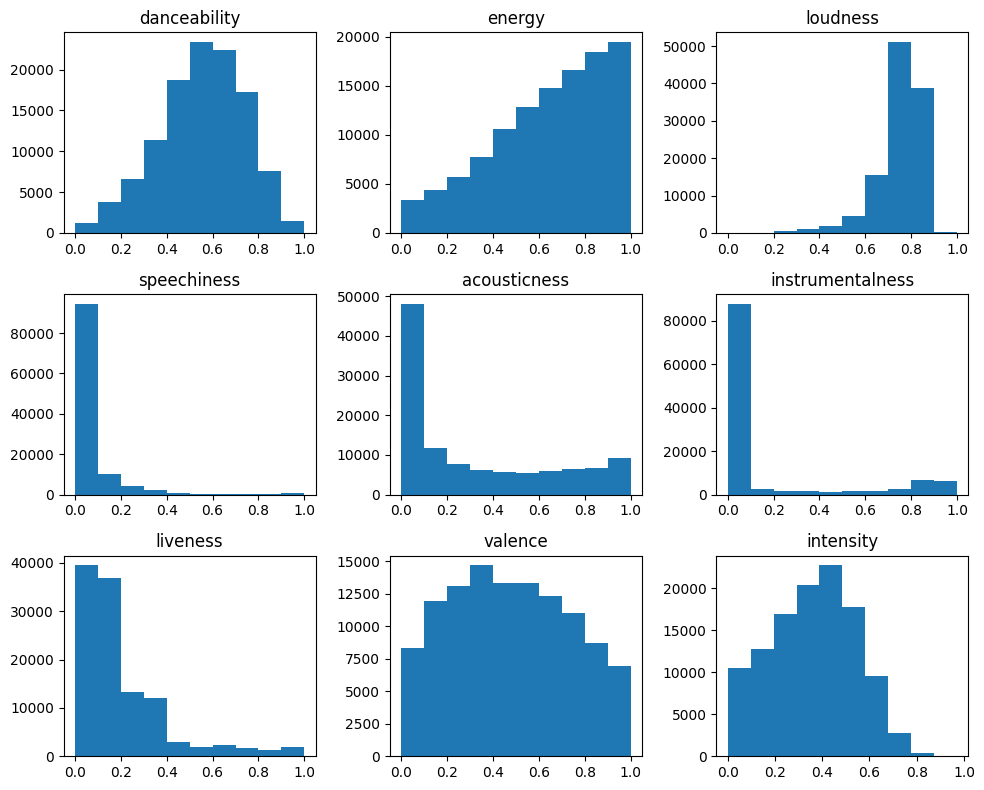

In [16]:
spotify[predictors_complete].hist(bins=10, figsize=(10, 8), grid=False)

# Mostrar el histograma
plt.tight_layout()
plt.show()

In [15]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Asumimos que tus datos ya están cargados en un DataFrame 'spotify' con los predictores completos
# Lista de predictores y el target (objetivo)
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(spotify[predictors_complete], spotify['popularity_class'], test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir los hiperparámetros expandidos para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimas muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimas muestras necesarias en una hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar
    'bootstrap': [True, False],  # Si se debe hacer bootstrapping o no
    'class_weight': ['balanced', 'balanced_subsample']  # Ajuste de peso de clases
}

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Crear el GridSearchCV con los nuevos hiperparámetros expandidos
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo en el conjunto de datos balanceados
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo Random Forest con los mejores parámetros obtenidos de GridSearchCV
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Mostrar la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion_mtx)


KeyboardInterrupt: 

In [43]:
# Definir las combinaciones recomendadas de predictores
predictors_complete = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'valence', 'intensity']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(spotify[predictors_complete], spotify['popularity_class'], test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con Random Forest en los datos balanceados
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Extraer la importancia de características desde el modelo entrenado
importances = rf.feature_importances_
feature_names = predictors_complete

# Crear un DataFrame para mostrar las características y sus importancias
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(importances_df)

            Feature  Importance
4      acousticness    0.125179
7           valence    0.122023
2          loudness    0.115358
3       speechiness    0.114090
6          liveness    0.111696
1            energy    0.109583
0      danceability    0.107226
8         intensity    0.106452
5  instrumentalness    0.088393


In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Lista de características más importantes
important_features = ['danceability', 'energy', 'loudness', 'valence', 'intensity']

# Supongamos que 'df' es tu DataFrame original con las características
# Primero aplicamos una transformación logarítmica a las características importantes
df_log_transformed = spotify.copy()
for feature in important_features:
    df_log_transformed[feature] = np.log1p(df_log_transformed[feature])

# Aplicamos MinMaxScaler después de la transformación logarítmica
scaler = MinMaxScaler()
df_scaled_important = df_log_transformed.copy()
df_scaled_important[important_features] = scaler.fit_transform(df_log_transformed[important_features])

# Mostrar los primeros valores transformados para las características más importantes
print(df_scaled_important[important_features].head())
# 

   instrumentalness  speechiness  acousticness   valence    energy
0          0.000001     0.174050      0.045903  0.781228  0.546945
1          0.000008     0.080633      0.946889  0.342943  0.221547
2          0.000000     0.050515      0.276012  0.164275  0.442532
3          0.000102     0.021565      0.932541  0.193732  0.083494
4          0.000000     0.045928      0.556683  0.223842  0.529060


In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Lista de características más importantes
important_features = ['instrumentalness', 'speechiness', 'acousticness', 'valence', 'energy']

# Supongamos que 'spotify' es tu DataFrame original con las características y el target
# Aplicamos una transformación logarítmica a las características importantes
df_log_transformed = spotify.copy()
for feature in important_features:
    df_log_transformed[feature] = np.log1p(df_log_transformed[feature])

# Aplicamos MinMaxScaler después de la transformación logarítmica
scaler = MinMaxScaler()
df_scaled_important = df_log_transformed.copy()
df_scaled_important[important_features] = scaler.fit_transform(df_log_transformed[important_features])

# Definir el conjunto de datos (características importantes) y el target
X = df_scaled_important[important_features]
y = spotify['popularity_class']  # Supongamos que 'popularity_scaled' es el target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Asegurarse de que las características sean las mismas tanto en X_train como en X_test
X_test = X_test[X_train_resampled.columns]  # Alinear las características de prueba con las de entrenamiento

# Entrenar el modelo Random Forest con los datos balanceados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Obtener las probabilidades de clase positiva en lugar de las predicciones directas
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Solo obtenemos la probabilidad de la clase positiva

# Ajustar el umbral de clasificación
threshold = 0.5  # Puedes modificar este valor para ajustar el umbral
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calcular las métricas con el nuevo umbral
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold, average='weighted')
recall = recall_score(y_test, y_pred_threshold, average='weighted')
f1 = f1_score(y_test, y_pred_threshold, average='weighted')

# Mostrar las métricas
print(f"Accuracy (umbral {threshold}): {accuracy:.4f}")
print(f"Precision (umbral {threshold}): {precision:.4f}")
print(f"Recall (umbral {threshold}): {recall:.4f}")
print(f"F1 Score (umbral {threshold}): {f1:.4f}")

# Mostrar la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred_threshold)
print("Matriz de Confusión (umbral ajustado):")
print(confusion_mtx)

Accuracy (umbral 0.5): 0.7448
Precision (umbral 0.5): 0.7475
Recall (umbral 0.5): 0.7448
F1 Score (umbral 0.5): 0.7449
Matriz de Confusión (umbral ajustado):
[[8554 3376]
 [2432 8398]]
